Tutorial 1 (12 April, 2021)
Practical Course: Learning For Self-Driving Cars and Intelligent Systems
Summer Semester 2021
Technical University of Munich
https://vision.in.tum.de/teaching/ss2021/intellisys_ss2021

In [1]:
import cv2
import numpy as np
from torch.utils.data import Dataset, DataLoader
import glob
import pdb
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage import io

In [2]:
class DepthDatasetLoader(Dataset):
    """"For loading RGB images and corresponding depth"""
    
    def __init__(self, dataset_directory):
        
        self.dataset_directory = dataset_directory
        self.rgb_images = sorted(glob.glob(self.dataset_directory +"RGB" + '/**/*'+".png", recursive=True))
        self.depth_images = sorted(glob.glob(self.dataset_directory +"Depth" + '/**/*'+".png", recursive=True))
        
    def __len__(self):
        return 50
    
    def __getitem__(self, idx):
        rgb_img_file = self.rgb_images[idx]
        depth_img_file = self.depth_images[idx]
        
        rgb_img = cv2.imread(rgb_img_file)[...,::-1] # bgr to rgb. Since opencv loads images as bgr
        depth_img = cv2.imread(depth_img_file, 0)    # Load as grayscale 
        depth_img = np.expand_dims(depth_img, 2)     # Add an extra channel dimension. Converts 
                                                     # (height, width) to (height, width, channel)
        
        rgb_img = np.transpose(rgb_img, (2,0,1))     # Since Pytorch models take tensors 
        depth_img = np.transpose(depth_img, (2,0,1)) # in (channel, width, height) format
        data = dict()
        data['rgb'] = rgb_img.copy()
        data['depth'] = depth_img.copy()
        data['filenames'] = (rgb_img_file, depth_img_file)
        return data

In [3]:
dd_object = DepthDatasetLoader(dataset_directory = "dataset/")

In [4]:
len(dd_object.rgb_images)

50

In [5]:
len(dd_object)

50

In [6]:
type(dd_object[10])

dict

In [7]:
type(dd_object[70])

IndexError: list index out of range

In [8]:
dd_object[10].keys()

dict_keys(['rgb', 'depth', 'filenames'])

In [9]:
dd_object[10]['rgb'].shape

(3, 512, 512)

In [10]:
dd_object[10]['depth'].shape

(1, 512, 512)

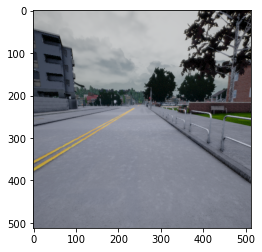

In [11]:
plt.imshow(np.transpose(dd_object[10]['rgb'], (1,2,0)))

# Multiple Images in a minibatch?

In [12]:
example_dataloader = DataLoader(dd_object, batch_size=7, shuffle=True, num_workers=1, drop_last=True)

In [13]:
for sub_iteration, minibatch in enumerate(example_dataloader):
    print(sub_iteration)
    print(minibatch['depth'].shape, minibatch['filenames'][0])

0
torch.Size([7, 1, 512, 512]) ('dataset/RGB/image_00047.png', 'dataset/RGB/image_00006.png', 'dataset/RGB/image_00038.png', 'dataset/RGB/image_00049.png', 'dataset/RGB/image_00036.png', 'dataset/RGB/image_00019.png', 'dataset/RGB/image_00010.png')
1
torch.Size([7, 1, 512, 512]) ('dataset/RGB/image_00008.png', 'dataset/RGB/image_00029.png', 'dataset/RGB/image_00030.png', 'dataset/RGB/image_00012.png', 'dataset/RGB/image_00035.png', 'dataset/RGB/image_00016.png', 'dataset/RGB/image_00007.png')
2
torch.Size([7, 1, 512, 512]) ('dataset/RGB/image_00041.png', 'dataset/RGB/image_00018.png', 'dataset/RGB/image_00048.png', 'dataset/RGB/image_00022.png', 'dataset/RGB/image_00028.png', 'dataset/RGB/image_00039.png', 'dataset/RGB/image_00017.png')
3
torch.Size([7, 1, 512, 512]) ('dataset/RGB/image_00003.png', 'dataset/RGB/image_00040.png', 'dataset/RGB/image_00025.png', 'dataset/RGB/image_00032.png', 'dataset/RGB/image_00001.png', 'dataset/RGB/image_00023.png', 'dataset/RGB/image_00000.png')
4
to

# Datalogging with Visdom 

In [14]:
import visdom
vis_obj = visdom.Visdom()
vis_obj.env = "DisplayDepthRGB"
example_dataloader = DataLoader(dd_object, batch_size=1, shuffle=True, num_workers=1, drop_last=True)


Setting up a new session...


In [16]:
for sub_iteration, minibatch in enumerate(example_dataloader):
    #pdb.set_trace()
    rgb_img = minibatch['rgb'][0]
    depth_img = minibatch['depth'][0]
    vis_obj.image(rgb_img, opts = dict(title = "RGB image"), win = 'rgb_image_window')
    vis_obj.image(depth_img, opts = dict(title = "Depth image"), win = 'depth_image_window')